Assignment Code: DA-AG-0010
Topic: Bagging, Boosting, KNN & Stacking
________________________________________
Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
Answer:
•	Fundamental Idea:
Ensemble learning combines multiple models (weak learners) to form a strong predictive model that performs better than any single model alone.
•	Bagging (Bootstrap Aggregating):
o	Creates multiple subsets of data using random sampling with replacement.
o	Trains independent models (e.g., Decision Trees) on each subset.
o	Final prediction: Average (for regression) or Majority Vote (for classification).
o	Goal: Reduce variance and prevent overfitting.
o	Example: Random Forest.
•	Boosting:
o	Trains models sequentially.
o	Each new model focuses on errors (misclassified points) made by the previous one.
o	Assigns higher weights to misclassified samples.
o	Goal: Reduce bias by making weak learners strong.
o	Example: AdaBoost, Gradient Boosting, XGBoost.
________________________________________
Question 2: How does Random Forest reduce overfitting compared to a single Decision Tree? ention two key hyperparameters involved.
Answer:
•	Overfitting Reduction:
Random Forest builds many decision trees on different random subsets of data and features.
Predictions are averaged, reducing variance and improving generalization.
•	Two Key Hyperparameters:
1.	n_estimators:
Number of trees in the forest.
More trees = more stable prediction, less variance.
2.	max_features:
Number of features considered for each split.
Randomizing features ensures trees are decorrelated, reducing overfitting.
________________________________________
Question 3: What is Stacking in ensemble learning? How does it differ from bagging/boosting? Give an example.
Answer:
•	Definition:
Stacking (Stacked Generalization) combines predictions of multiple models (base learners) using a meta-model (blender) that learns the best way to combine them.
•	Difference from Bagging/Boosting:
o	Bagging & Boosting combine models of same type (homogeneous).
o	Stacking uses different models (heterogeneous), e.g., SVM, Decision Tree, Logistic Regression together.
•	Example Use Case:
Combine Logistic Regression, Decision Tree, and SVM as base models → use a Meta-Model (e.g., Random Forest) to make the final prediction.
________________________________________
Question 4: What is the OOB (Out-of-Bag) Score in Random Forest and why is it useful?
Answer:
•	OOB Score Definition:
When building each tree, about 1/3 of samples are not used (out-of-bag) during bootstrap sampling.
These are used as a validation set to estimate model performance internally.
•	Usefulness:
o	Provides unbiased validation accuracy without needing a separate test set.
o	Saves data and computation time.
o	Acts as a built-in cross-validation method.
________________________________________
Question 5: Compare AdaBoost and Gradient Boosting.
Aspect	AdaBoost	Gradient Boosting
Error Handling	Focuses on misclassified samples by assigning higher weights.	Minimizes loss function gradient directly.
Weight Update	Increases weights for misclassified instances; reduces for correctly classified ones.	Adds new trees to fit the residual errors.
Base Learners	Usually Decision Stumps (shallow trees).	Can use deeper trees.
Objective	Improve weak classifiers via reweighting samples.	Optimize a custom loss function iteratively.
Use Cases	Simple problems, fast models.	Complex regression/classification problems.
________________________________________
Question 6: Why does CatBoost perform well on categorical features without preprocessing?
Answer:
•	Reason:
CatBoost uses ordered target statistics and permutation-driven encoding to handle categorical features internally.
•	How It Works:
o	Converts categorical features into numeric values based on target mean encoding (but done carefully to avoid overfitting).
o	Applies ordered boosting, ensuring that future data is not leaked during encoding.
o	Reduces need for one-hot encoding or manual preprocessing.
•	Result:
Handles categorical data natively, improving performance and reducing preprocessing time.
________________________________________


In [6]:
# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
# Optimization
# Task:
# 1. Load the Wine dataset (sklearn.datasets.load_wine()).
# 2. Split data into 70% train and 30% test.
# 3. Train a KNN classifier (default K=5) without scaling and evaluate using:
# a. Accuracy
# b. Precision, Recall, F1-Score (print classification report)
# 4. Apply StandardScaler, retrain KNN, and compare metrics.
# 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
# (Euclidean, Manhattan).
# 6. Train the optimized KNN and compare results with the unscaled/scaled versions.


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [7]:
data = load_wine()
X, y = data.data, data.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy (Unscaled):", accuracy_score(y_test, y_pred))
print("Classification Report (Unscaled):\n", classification_report(y_test, y_pred))

Accuracy (Unscaled): 0.7037037037037037
Classification Report (Unscaled):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.63      0.63      0.63        19
           2       0.42      0.42      0.42        12

    accuracy                           0.70        54
   macro avg       0.65      0.65      0.65        54
weighted avg       0.70      0.70      0.70        54



In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("Accuracy (Scaled):", accuracy_score(y_test, y_pred_scaled))
print("Classification Report (Scaled):\n", classification_report(y_test, y_pred_scaled))

Accuracy (Scaled): 0.9814814814814815
Classification Report (Scaled):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [14]:
# Step 5: Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Split data into 70% train and 30% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7}
Best CV Accuracy: 0.976


In [15]:
# Step 6: Train Optimized KNN and Compare
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("Accuracy (Optimized KNN):", accuracy_score(y_test, y_pred_best))
print("Classification Report (Optimized KNN):\n", classification_report(y_test, y_pred_best))


Accuracy (Optimized KNN): 0.9814814814814815
Classification Report (Optimized KNN):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [17]:
# Question 8 : PCA + KNN with Variance Analysis and Visualization
# Task:
# 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
# 2. Apply PCA and plot the scree plot (explained variance ratio).
# 3. Retain 95% variance and transform the dataset.
# 4. Train KNN on the original data and PCA-transformed data, then compare
# accuracy.
# 5. Visualize the first two principal components using a scatter plot (color by class).

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [18]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
print("Original shape:", X.shape)

Original shape: (569, 30)


In [19]:
# Step 2: Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

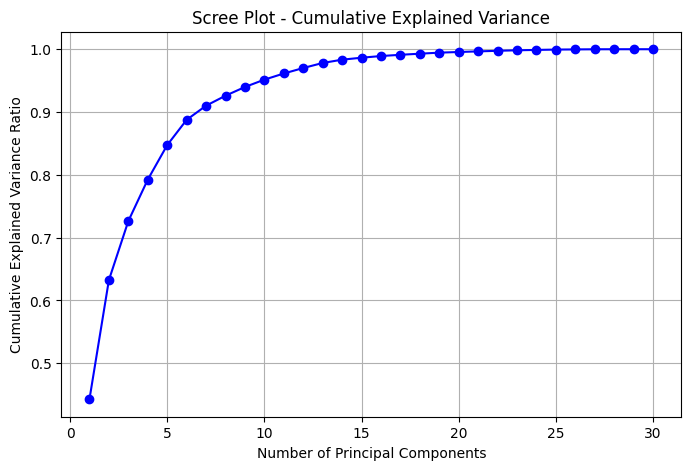

In [20]:
# Step 3: Apply PCA and Plot the Scree Plot
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_variance, marker='o', color='b')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [22]:
# Step 4: Retain 95% Variance and Transform the Dataset
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)
print("Reduced shape (95% variance):", X_pca.shape)

Reduced shape (95% variance): (569, 10)


In [23]:
# Step 5: Train KNN on Original and PCA-Transformed Data
# Split both datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_orig = knn.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

knn.fit(X_pca_train, y_train)
y_pred_pca = knn.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("KNN Accuracy (Original Data):", round(acc_orig, 4))
print("KNN Accuracy (PCA Reduced Data):", round(acc_pca, 4))

KNN Accuracy (Original Data): 0.9708
KNN Accuracy (PCA Reduced Data): 0.9474


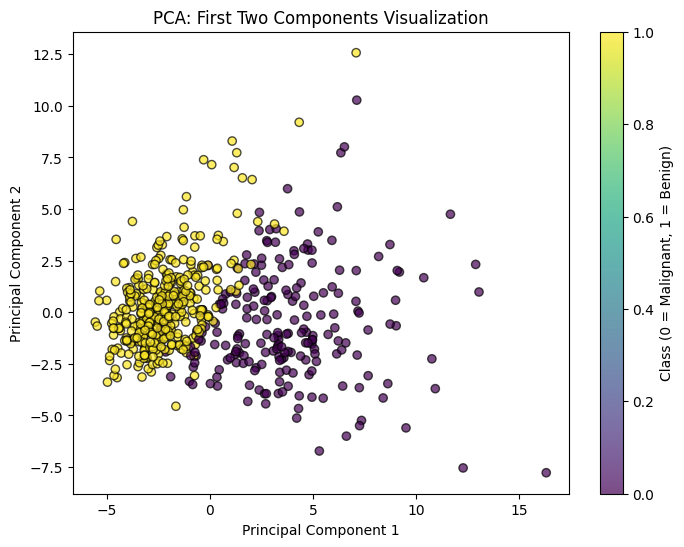

In [24]:
# Step 6: Visualize First Two Principal Components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Components Visualization')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()

In [25]:
# Question 9:KNN Regressor with Distance Metrics and K-Value
# Analysis
# Task:
# 1. Generate a synthetic regression dataset
# (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
# 2. Train a KNN regressor with:
# a. Euclidean distance (K=5)
# b. Manhattan distance (K=5)
# c. Compare Mean Squared Error (MSE) for both.
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Generate Synthetic Regression Dataset
# Generate dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Train KNN Regressor with Different Distance Metrics
# KNN with Euclidean distance (default)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# KNN with Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("MSE (Euclidean Distance):", round(mse_euclidean, 2))
print("MSE (Manhattan Distance):", round(mse_manhattan, 2))

MSE (Euclidean Distance): 4803.91
MSE (Manhattan Distance): 5210.23


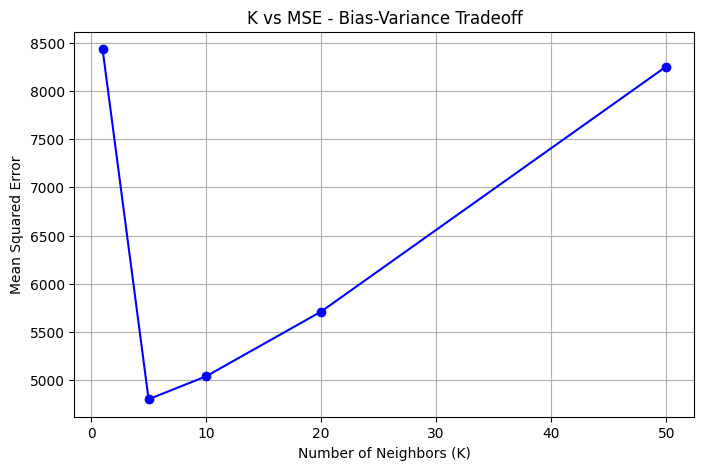

In [28]:
# Analyze Bias-Variance Tradeoff (K vs. MSE)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', color='b')
plt.title('K vs MSE - Bias-Variance Tradeoff')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [29]:
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
# Data
# Task:
# 1. Load the Pima Indians Diabetes dataset (contains missing values).
# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
# 3. Train KNN using:
# a. Brute-force method
# b. KD-Tree
# c. Ball Tree
# 4. Compare their training time and accuracy.
# 5. Plot the decision boundary for the best-performing method (use 2 most important
# features).
# Dataset: Pima Indians Diabetes

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time

In [34]:
# Load the Pima Indians Diabetes dataset
# The dataset is available at:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
# Replace zeros with NaN in selected columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify imputation
data_imputed.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [36]:
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [37]:
results = {}

# a. Brute-force
start = time.time()
knn_brute = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn_brute.fit(X_train, y_train)
y_pred = knn_brute.predict(X_test)
end = time.time()
results['Brute-force'] = [accuracy_score(y_test, y_pred), end - start]

# b. KD-Tree
start = time.time()
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
y_pred = knn_kd.predict(X_test)
end = time.time()
results['KD-Tree'] = [accuracy_score(y_test, y_pred), end - start]

# c. Ball Tree
start = time.time()
knn_ball = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
y_pred = knn_ball.predict(X_test)
end = time.time()
results['Ball Tree'] = [accuracy_score(y_test, y_pred), end - start]

# Show comparison
results_df = pd.DataFrame(results, index=['Accuracy', 'Training Time (sec)']).T
print(results_df)


             Accuracy  Training Time (sec)
Brute-force  0.675325             0.019612
KD-Tree      0.675325             0.027210
Ball Tree    0.675325             0.008075


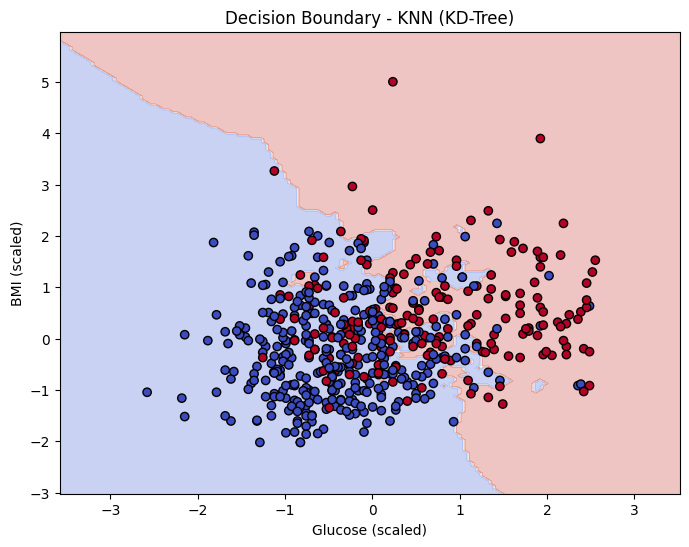

In [38]:
# Select top 2 features for visualization
X_vis = data_imputed[['Glucose', 'BMI']]
y_vis = data_imputed['Outcome']

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_best.fit(X_train_vis, y_train_vis)

# Decision boundary
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap='coolwarm', edgecolors='k')
plt.title('Decision Boundary - KNN (KD-Tree)')
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.show()
